In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn yfinance keras tensorflow


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetching stock data for a specific company (e.g., Apple)
ticker = 'AAPL'
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")

# Display first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


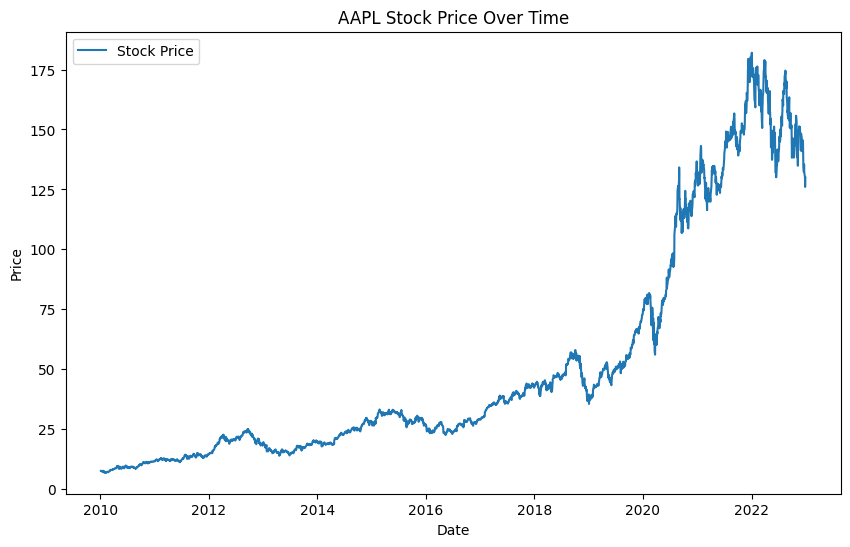

In [4]:
# Keep only the 'Close' column for price prediction
data = data[['Close']]

# Fill any missing values
data = data.dropna()

# Visualizing stock price
plt.figure(figsize=(10, 6))
plt.plot(data, label='Stock Price')
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [5]:
# Use past 60 days' prices to predict the next day's price
window = 60

def create_dataset(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create X, y datasets
X, y = create_dataset(scaled_data, window)

# Reshape X for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)



In [6]:
#building the LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Building the LSTM Model
model = Sequential()

# Adding the LSTM layers and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X, y, epochs=25, batch_size=32)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0168
Epoch 2/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0018
Epoch 3/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0013
Epoch 4/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0015
Epoch 5/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0013
Epoch 6/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0011
Epoch 7/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0010
Epoch 8/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0011
Epoch 9/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0012
Epoch 10/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0010
Epoch 11/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 9.6704e-04
Epoch 12/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0011
Epoch 13/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0010
Epoch 14/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 9.2052e-04
Epoch 15/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s

In [7]:
# Test on last 60 days of data
test_data = scaled_data[-window:]

X_test = []
X_test.append(test_data)
X_test = np.array(X_test)

# Reshape for LSTM
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted Price: {predicted_price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Predicted Price: [[136.20479]]
